In [168]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

def plot_bars(title, TA, R, typ):

    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(10, 8))

    # set height of bar
#     TA = [12, 30]
#     R = [28, 6]

    # Set position of bar on X axis
    br1 = np.array([0, 0.7])
    br1 = br1 + barWidth/2
    br2 = [x + barWidth for x in br1]
    
    
    # Make the plot
    plt.bar(br1, TA, color ='r', width = barWidth,
            edgecolor ='grey', label = typ+' Turnaround Time') #second last
    plt.bar(br2, R, color ='g', width = barWidth,
            edgecolor ='grey', label =typ+' Response Time') # last

    # Adding Xticks
    plt.xlabel('Scheduling Aglorithm', fontweight ='bold', fontsize = 25)
    plt.ylabel('Time (in seconds)', fontweight ='bold', fontsize = 25)
    plt.xticks([r + barWidth for r in np.array([0, 0.7])],
            ['FIFO', 'SFF'], fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize=30)
#     plt.gca().set_ylim(bottom=0)
    # plt.legend(loc=2, prop={'size': 15})
    plt.legend(fontsize=25)
#     plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title(title, fontsize = 30)
#     plt.show()
    plt.savefig("outputs1/"+title+" "+typ, bbox_inches="tight")
    
# plot_bars("sdfasdfasdf sdf d", None, None, "Mean")

In [169]:
def get_plots(datatype, poolsize):
    ta_fifo, ta_sff, r_fifo, r_sff = None, None, None, None
    for schedulingalgo in ["FIFO","SFF"]:
        fname = "Results/"+datatype + "_" + poolsize + "pool_" + schedulingalgo + '.txt'
        turnarounds = []
        responses = []
        
        with open(fname, 'r') as f:
            line = f.readline().strip()
            while(line):
                s_arr = line.split(' ')
                if len(s_arr) > 2:
                    arr = [float(a) for a in s_arr]
                    turnarounds.append(arr[-2])
                    responses.append(arr[-1])
                line = f.readline().strip()
                    
        if schedulingalgo == "FIFO":
            ta_fifo, r_fifo = turnarounds, responses
            
        else: 
            ta_sff, r_sff = turnarounds, responses
    
    if datatype == "smalldata":
        d = "Small Data"
    elif datatype == "mixeddata":
        d = "Mixed Data"
    elif datatype == "largedata":
        d = "Large Data"
        
    title = "Data Type: "+ d + ", Pool Size: " + poolsize
    
    TA = [max(ta_fifo), max(ta_sff)]
    R = [max(r_fifo), max(r_sff)]
    plot_bars(title, TA, R, "Max")
    
    TA = [min(ta_fifo), min(ta_sff)]
    R = [min(r_fifo), min(r_sff)]
    plot_bars(title, TA, R, "Min")
    
    TA = [statistics.mean(ta_fifo), statistics.mean(ta_sff)]
    R = [statistics.mean(r_fifo), statistics.mean(r_sff)]
    plot_bars(title, TA, R, "Mean")
    

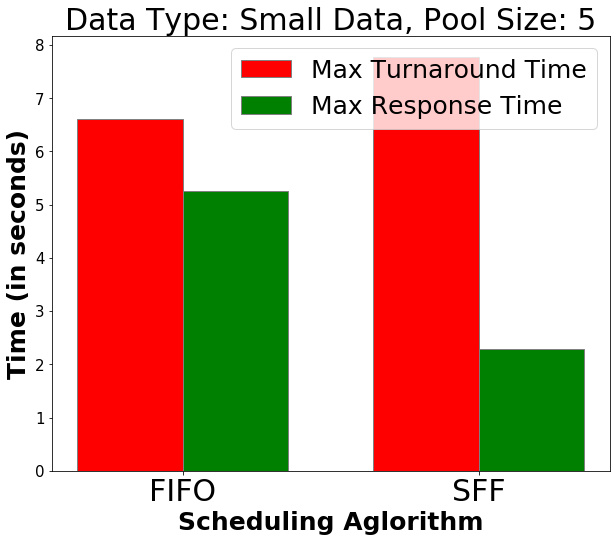

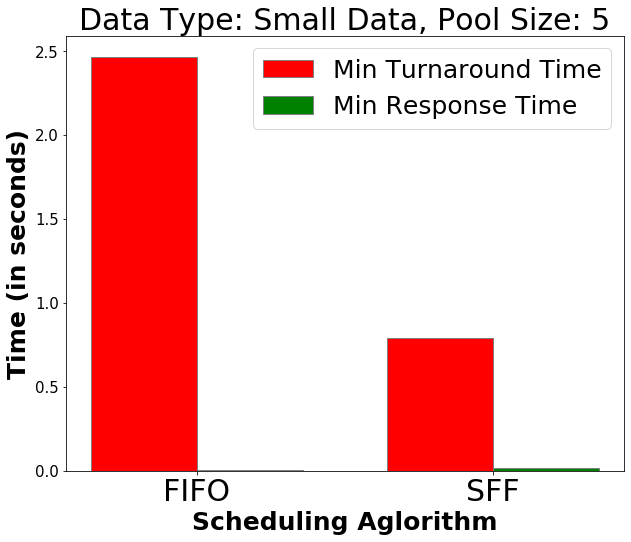

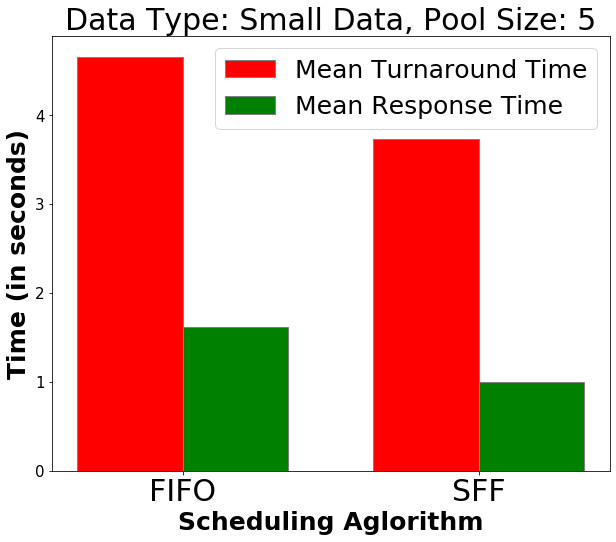

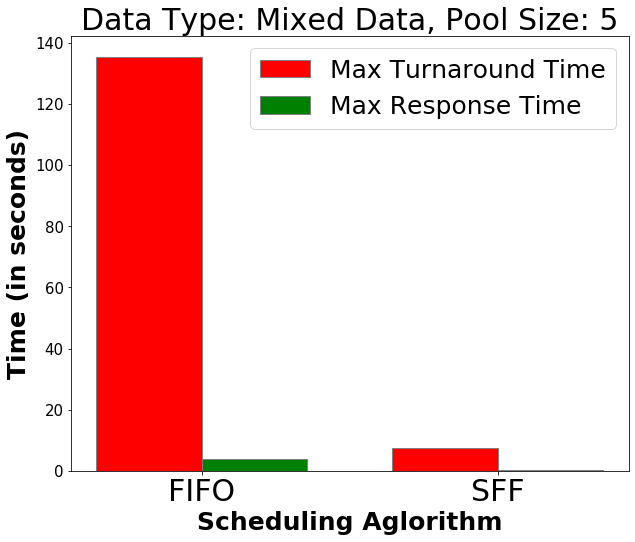

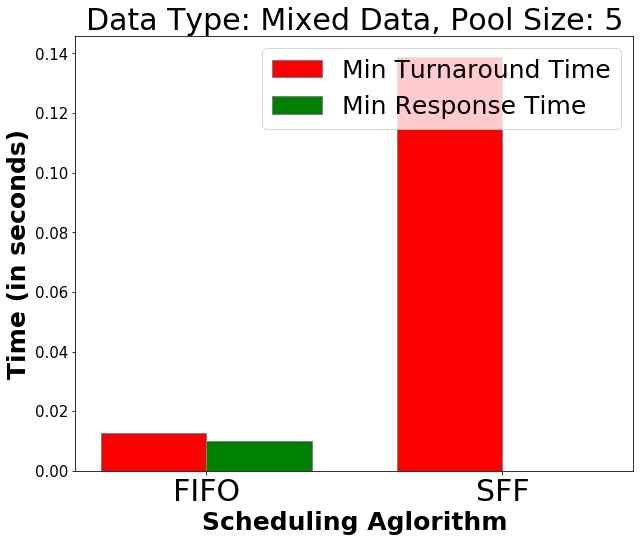

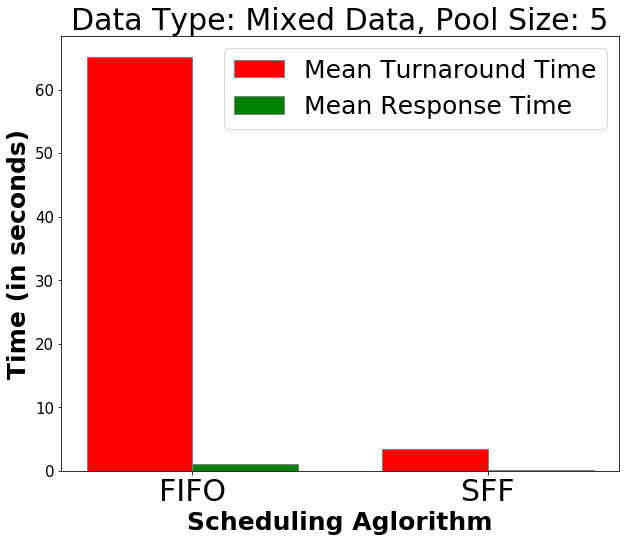

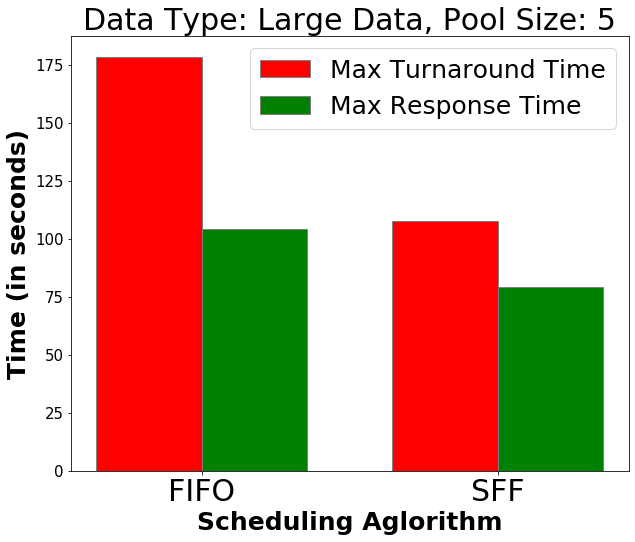

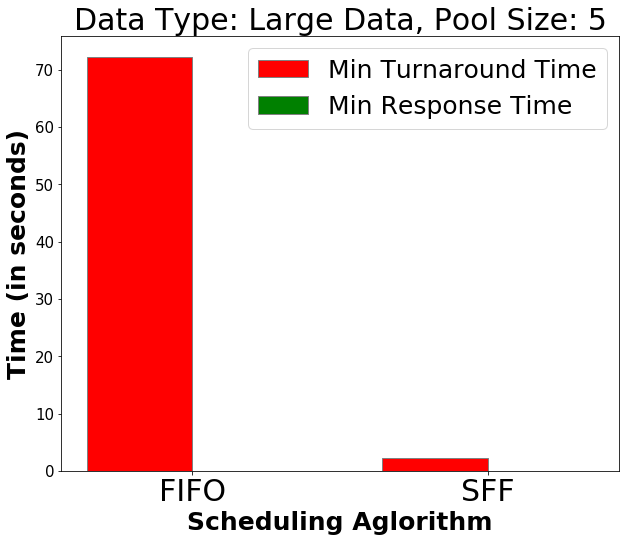

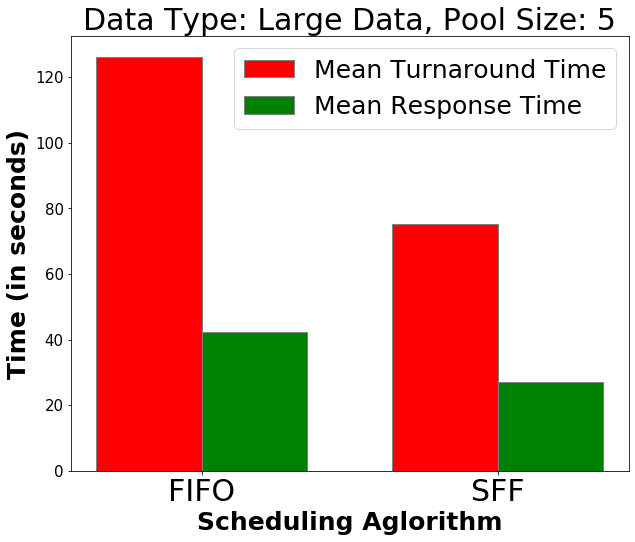

In [170]:
for datatype in ["smalldata","mixeddata","largedata"]:
    for poolsize in ["5"]:
        get_plots(datatype, poolsize)

# for datatype in ["mixeddata"]:            
#     for poolsize in ["1", "5", "10"]:
#          get_plots(datatype, poolsize)
                